### Data link

https://aqs.epa.gov/aqsweb/airdata/hourly_88502_2017.zip

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [2]:
data = pd.read_csv('../../data/hourly_88502_2017.zip')
data.head(2)

/home/patel_zeel/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,1,55,10,88502,3,33.991494,-85.992647,NAD83,Acceptable PM2.5 AQI & Speciation Mass,2017-01-05,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,Non-FRM,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,Alabama,Etowah,2017-05-18
1,1,55,10,88502,3,33.991494,-85.992647,NAD83,Acceptable PM2.5 AQI & Speciation Mass,2017-01-05,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,Non-FRM,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,Alabama,Etowah,2017-05-18


In [3]:
data.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Date Local',
       'Time Local', 'Date GMT', 'Time GMT', 'Sample Measurement',
       'Units of Measure', 'MDL', 'Uncertainty', 'Qualifier', 'Method Type',
       'Method Code', 'Method Name', 'State Name', 'County Name',
       'Date of Last Change'],
      dtype='object')

In [4]:
data['Parameter Name'].value_counts()

Acceptable PM2.5 AQI & Speciation Mass    3055658
Name: Parameter Name, dtype: int64

### Verify data

In [5]:
df = data[data['State Name'] == 'Washington']
df['Date Local'] = pd.to_datetime(df['Date Local'])
df = df[df['Date Local'] <= '2017-01-31']

<ipython-input-5-1f5a15186089>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date Local'] = pd.to_datetime(df['Date Local'])


In [6]:
df['station_id'] = df['Longitude'].apply(lambda x: str(round(x, 1))) + '_' + df['Latitude'].apply(lambda x: str(round(x, 1)))
df['station_id'].unique().shape

(38,)

### Load GDF

In [7]:
gdf = gpd.read_file('../../data/WA_State_Boundary.geojson')
gdf

,OBJECTID,JURISDICT_SYST_ID,JURISDICT_TYPE_CD,JURISDICT_LABEL_NM,JURISDICT_NM,JURISDICT_DESG_CD,JURISDICT_FIPS_DESG_CD,JURISDICT_VACATED_FLG,EDIT_DATE,EDIT_STATUS,EDIT_WHO,SHAPEAREA,SHAPELEN,geometry
0,7925,1,3,Washington,Washington State,53,53,None,2020-03-11T22:17:11+00:00,1,TSTE490,1.989098e+12,6.490124e+06,"POLYGON ((-117.03211 48.96046, -117.03226 48.9..."


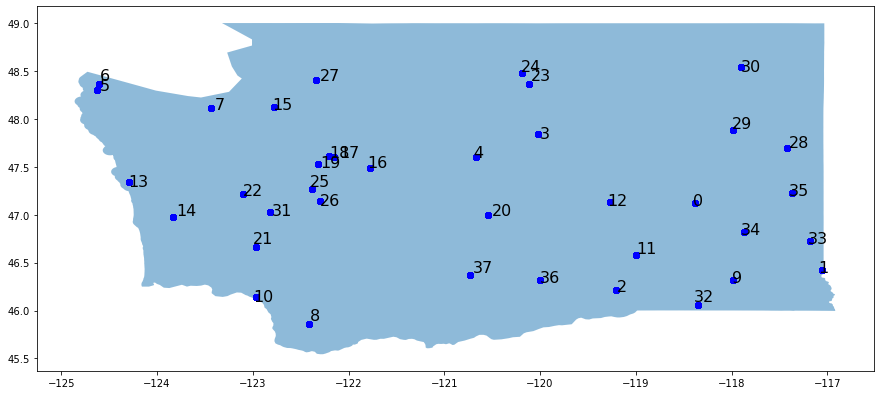

In [8]:
mask = []
gspat = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

all_stations = gspat['station_id'].unique()

fig, ax = plt.subplots(figsize=(15,10))
gdf.plot(ax=ax,alpha=0.5);
ax.set_aspect("equal");
gspat.plot(ax=ax, color='b')
for idx, lon_lat in enumerate(all_stations):
    lon, lat = lon_lat.split('_')
#     ax.scatter(float(lon), float(lat), color='r', s=100)
    ax.text(float(lon), float(lat), idx, fontdict=dict(size=16))

In [9]:
bad_stations = [19, 11, 13, 4, 20]
good_df = df[~df.station_id.isin(all_stations[bad_stations])]
good_df['Time-stamp'] = pd.to_datetime(good_df['Date Local'].apply(str) + ' ' + good_df['Time Local'])
good_df = good_df.set_index('Time-stamp').sort_index()
good_df.station_id.value_counts()

<ipython-input-9-146a3eace09b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['Time-stamp'] = pd.to_datetime(good_df['Date Local'].apply(str) + ' ' + good_df['Time Local'])


-123.4_48.1    744
-118.0_46.3    744
-120.0_46.3    744
-122.8_48.1    744
-117.1_46.4    744
-122.2_47.6    744
-120.0_47.8    744
-123.8_47.0    744
-119.3_47.1    743
-117.4_47.2    743
-118.0_47.9    743
-123.1_47.2    743
-117.9_48.5    743
-117.9_46.8    743
-118.4_47.1    743
-120.1_48.4    743
-117.4_47.7    743
-119.2_46.2    743
-123.0_46.1    743
-124.6_48.4    742
-122.4_47.3    742
-123.0_46.7    742
-121.8_47.5    741
-122.3_47.1    740
-122.1_47.6    740
-122.8_47.0    739
-124.6_48.3    737
-120.7_46.4    719
-117.2_46.7    710
-122.4_45.9    703
-122.3_48.4    604
-118.4_46.1    406
-120.2_48.5    335
Name: station_id, dtype: int64

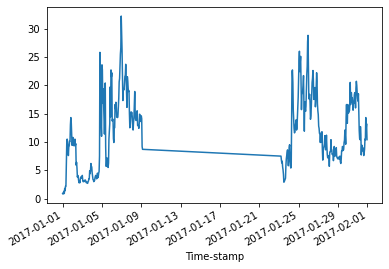

In [10]:
good_df[good_df.station_id == '-118.4_46.1']['Sample Measurement'].plot();

In [11]:
s = []
for t in good_df.index:
    s.append(good_df.loc[t]['Sample Measurement'].dropna().shape[0])

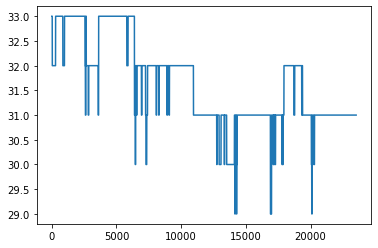

In [12]:
plt.plot(s)

### Interpolate missing values with different algorithms

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.svm import SVR
from polire import Kriging, IDW
from scipy.spatial.distance import cdist

regs = {'Linear':LinearRegression, 'GBDT':GradientBoostingRegressor, 
        'RF':RandomForestRegressor, 'krig':Kriging, 'knn':KNeighborsRegressor, 'svr':SVR, 
        'idw':IDW, 'gp':GaussianProcessRegressor}
tests = {key:[] for key in regs}
preds = {key:[] for key in regs}

for ti, t in enumerate(good_df.index.unique()):
    clear_output(wait=True)
    print(t)
    tmp_df = good_df.loc[t]
    if tmp_df.shape[0] == 33:
        Xscaler = StandardScaler()
        yscaler = StandardScaler()
        X = tmp_df[['Longitude', 'Latitude']].values
        y = tmp_df[['Sample Measurement']].values
        
        X = (X-X.min(axis=0).reshape(1,2))/(X.max(axis=0).reshape(1,2) - X.min(axis=0).reshape(1,2))
        y = (y - y.min())/(y.max() - y.min())
        
        Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=1, random_state=ti+1)
        
        for name in regs:
            if name=='krig':
                m = regs[name](variogram_model='spherical')
            elif name=='idw':
                m = regs[name](exponent=1)
            elif name=='gp':
                m = regs[name](kernel=Matern(length_scale=[0.1, 0.9]))
            elif name=='knn':
                m = regs[name](16)
            else:
                m = regs[name]()
            K = 16
            top = np.argsort(cdist(Xtr, Xte).ravel())[:16]
            # With transform
#             m.fit(Xscaler.fit_transform(Xtr[top]), yscaler.fit_transform(ytr[top]).ravel())
#             preds[name].extend(yscaler.inverse_transform(m.predict(Xscaler.transform(Xte))))
            # Without transform
            m.fit(Xtr[top], ytr.ravel()[top])
            preds[name].extend(m.predict(Xte))
            tests[name].extend(yte.ravel().tolist())

2017-01-31 23:00:00


Linear , RMSE: 0.26617600891876486 R2 0.057111276821946166
GBDT , RMSE: 0.3015480591105121 R2 -0.21014022998051352
RF , RMSE: 0.27159693726922485 R2 0.018314536198390297
krig , RMSE: 0.2719408638293749 R2 0.015826721135524302
knn , RMSE: 0.27687091852022433 R2 -0.020181178344008455
svr , RMSE: 0.2631999115136502 R2 0.07807816349621699
idw , RMSE: 0.2605566522870182 R2 0.09650250009918415
gp , RMSE: 0.35954059304369346 R2 -0.7203566269398494


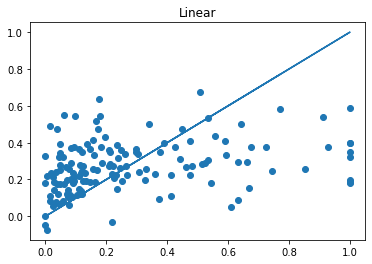

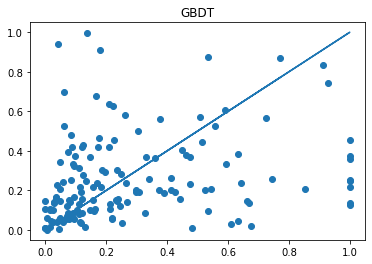

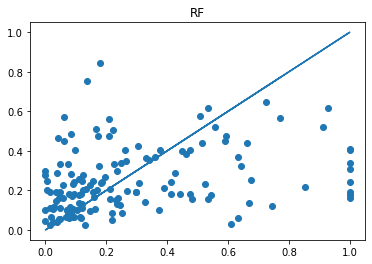

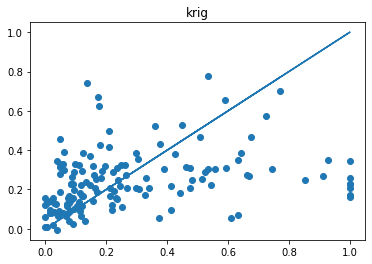

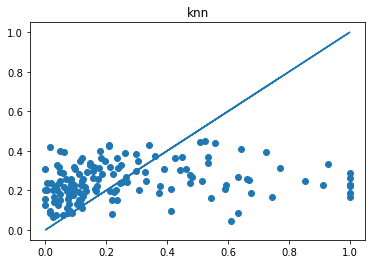

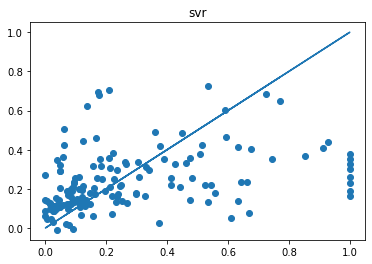

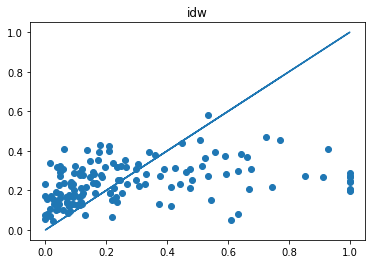

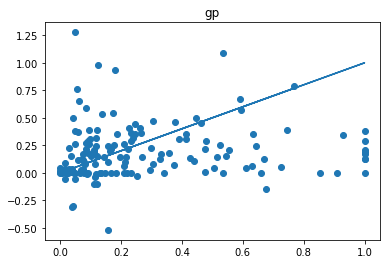

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

for name in regs:
    print(name, ', RMSE:', mean_squared_error(tests[name], preds[name], squared=False), 
          'R2', r2_score(tests[name], preds[name]))
    plt.figure()
    plt.plot(tests[name], tests[name])
    plt.scatter(tests[name], preds[name])
    plt.title(name)

In [184]:
for stn in good_df.station_id.unique():
    print('max', good_df[good_df.station_id==stn]['Sample Measurement'].max(), 
         'min', good_df[good_df.station_id==stn]['Sample Measurement'].min(),
         'mean', good_df[good_df.station_id==stn]['Sample Measurement'].mean())

max 38.9 min 0.1 mean 4.852893674293406
max 19.6 min 1.8 mean 5.245430107526879
max 27.9 min 2.4 mean 6.91827956989247
max 32.2 min 0.8 mean 11.931280788177341
max 59.5 min 0.3 mean 9.862516914749653
max 15.6 min 0.7 mean 5.768909825033654
max 24.6 min 1.3 mean 9.143606998654098
max 50.1 min 2.3 mean 16.41345895020187
max 58.4 min 0.1 mean 11.02608108108108
max 31.3 min 1.0 mean 9.765679676985199
max 60.9 min 1.3 mean 10.220995962314948
max 49.0 min 2.5 mean 16.322072678331082
max 32.9 min 1.3 mean 9.345895020188436
max 48.4 min 2.6 mean 12.590188172043014
max 41.3 min 1.2 mean 9.66537313432835
max 25.6 min 0.0 mean 4.7531081081081075
max 33.9 min 1.9 mean 13.032570659488574
max 22.1 min 0.0 mean 4.241374663072778
max 29.9 min 0.6 mean 8.905795148247973
max 32.0 min 1.6 mean 9.19072580645162
max 50.8 min 2.2 mean 18.99798387096774
max 20.6 min 0.8 mean 5.181695827725442
max 18.3 min 0.6 mean 5.658602150537632
max 14.4 min 0.6 mean 3.535430463576159
max 25.7 min 1.5 mean 6.5048452220726

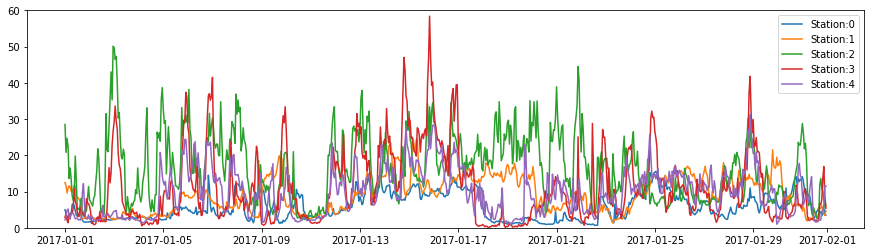

In [39]:
i = 5
plt.figure(figsize=(15,4))
for sti, stn in enumerate(good_df.station_id.unique()[i:i+5]):
    plt.plot(good_df[good_df.station_id==stn]['Sample Measurement'], label='Station:'+str(sti))
    plt.ylim(0, 60)

plt.legend();